In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
car_data = pd.read_csv('Car_sales_transactions.csv', sep=",",header = 0, encoding='latin')
car_data.head()

,Sales_ID,Name,Year,Selling_Price,km_Driven,City_Code,State_Code,Postal_Code,Fuel,Seller_Type,Transmission,Owner,Mileage,Engine,Max_Power,Seats
0,1,Maruti Swift Dzire VDI,2014,450000,145500,CT01,ST15,400001,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,CT28,ST11,834001,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5
2,3,Honda City 2017-2020 EXi,2006,158000,140000,CT12,ST28,201301,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5
3,4,Hyundai i20 Sportz Diesel,2010,225000,127000,CT21,ST27,248001,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5
4,5,Maruti Swift VXI BSIII,2007,130000,120000,CT03,ST24,600020,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5


In [3]:
sales_status = pd.read_csv('Sales_Status.csv')
city_master = pd.read_excel('City_Master.xlsx')
region = pd.read_excel('Region_Master.xlsx')
region_state = pd.read_excel('Region_State_Mapping.xlsx')
state = pd.read_excel('State_Master.xlsx')
car_data = pd.merge(car_data,city_master[['City_Code','City_Name']],how ='left',on='City_Code')
car_data = pd.merge(car_data,region_state, how ='left',on='State_Code')
car_data = pd.merge(car_data,sales_status, how = 'left', on='Sales_ID')
car_data = pd.merge(car_data,state, how = 'left', on='State_Code')
car_data = pd.merge(car_data,region, how = 'left', on='Region_Code')
car_data.head()

,Sales_ID,Name,Year,Selling_Price,km_Driven,City_Code,State_Code,Postal_Code,Fuel,Seller_Type,...,Owner,Mileage,Engine,Max_Power,Seats,City_Name,Region_Code,Sold,State_Name,Region
0,1,Maruti Swift Dzire VDI,2014,450000,145500,CT01,ST15,400001,Diesel,Individual,...,First Owner,23.4 kmpl,1248 CC,74 bhp,5,Mumbai,R3,Y,Maharashtra,West
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,CT28,ST11,834001,Diesel,Individual,...,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5,Ranchi,R2,Y,Jharkhand,East
2,3,Honda City 2017-2020 EXi,2006,158000,140000,CT12,ST28,201301,Petrol,Individual,...,Third Owner,17.7 kmpl,1497 CC,78 bhp,5,Noida,R1,Y,Uttar Pradesh,Central
3,4,Hyundai i20 Sportz Diesel,2010,225000,127000,CT21,ST27,248001,Diesel,Individual,...,First Owner,23.0 kmpl,1396 CC,90 bhp,5,Dehradun,R1,Y,Uttarakhand,Central
4,5,Maruti Swift VXI BSIII,2007,130000,120000,CT03,ST24,600020,Petrol,Individual,...,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5,Chennai,R4,Y,Tamil Nadu,South


In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 7905
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales_ID       7906 non-null   int64 
 1   Name           7906 non-null   object
 2   Year           7906 non-null   int64 
 3   Selling_Price  7906 non-null   int64 
 4   km_Driven      7906 non-null   int64 
 5   City_Code      7906 non-null   object
 6   State_Code     7906 non-null   object
 7   Postal_Code    7906 non-null   int64 
 8   Fuel           7906 non-null   object
 9   Seller_Type    7906 non-null   object
 10  Transmission   7906 non-null   object
 11  Owner          7906 non-null   object
 12  Mileage        7906 non-null   object
 13  Engine         7906 non-null   object
 14  Max_Power      7906 non-null   object
 15  Seats          7906 non-null   int64 
 16  City_Name      7906 non-null   object
 17  Region_Code    7906 non-null   object
 18  Sold           7906 non-null

C:\Users\kasathish\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price'>

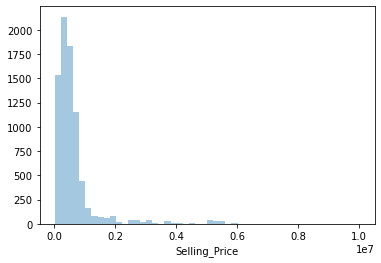

In [5]:
sns.distplot(car_data['Selling_Price'],bins=50,kde=False)

In [6]:
car_data['brand']=car_data['Name'].apply(lambda x:x.split()[0])
car_data['Mileage']=car_data['Mileage'].apply(lambda x:x.split()[0]).astype('float64')
car_data['Engine']=car_data['Engine'].apply(lambda x:x.split()[0]).astype('int64')
car_data['Max_Power']=car_data['Max_Power'].apply(lambda x:x.split()[0]).astype('float64')
car_data

,Sales_ID,Name,Year,Selling_Price,km_Driven,City_Code,State_Code,Postal_Code,Fuel,Seller_Type,...,Mileage,Engine,Max_Power,Seats,City_Name,Region_Code,Sold,State_Name,Region,brand
0,1,Maruti Swift Dzire VDI,2014,450000,145500,CT01,ST15,400001,Diesel,Individual,...,23.40,1248,74.00,5,Mumbai,R3,Y,Maharashtra,West,Maruti
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,CT28,ST11,834001,Diesel,Individual,...,21.14,1498,103.52,5,Ranchi,R2,Y,Jharkhand,East,Skoda
2,3,Honda City 2017-2020 EXi,2006,158000,140000,CT12,ST28,201301,Petrol,Individual,...,17.70,1497,78.00,5,Noida,R1,Y,Uttar Pradesh,Central,Honda
3,4,Hyundai i20 Sportz Diesel,2010,225000,127000,CT21,ST27,248001,Diesel,Individual,...,23.00,1396,90.00,5,Dehradun,R1,Y,Uttarakhand,Central,Hyundai
4,5,Maruti Swift VXI BSIII,2007,130000,120000,CT03,ST24,600020,Petrol,Individual,...,16.10,1298,88.20,5,Chennai,R4,Y,Tamil Nadu,South,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,8124,Hyundai i20 Magna,2013,320000,110000,CT22,ST14,452010,Petrol,Individual,...,18.50,1197,82.85,5,Indore,R1,N,Madhya Pradesh,Central,Hyundai
7902,8125,Hyundai Verna CRDi SX,2007,135000,119000,CT21,ST27,248001,Diesel,Individual,...,16.80,1493,110.00,5,Dehradun,R1,N,Uttarakhand,Central,Hyundai
7903,8126,Maruti Swift Dzire ZDi,2009,382000,120000,CT08,ST29,700005,Diesel,Individual,...,19.30,1248,73.90,5,Kolkata,R2,N,West Bengal,East,Maruti
7904,8127,Tata Indigo CR4,2013,290000,25000,CT29,ST24,632001,Diesel,Individual,...,23.57,1396,70.00,5,Vellore,R4,N,Tamil Nadu,South,Tata


In [7]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 7905
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sales_ID       7906 non-null   int64  
 1   Name           7906 non-null   object 
 2   Year           7906 non-null   int64  
 3   Selling_Price  7906 non-null   int64  
 4   km_Driven      7906 non-null   int64  
 5   City_Code      7906 non-null   object 
 6   State_Code     7906 non-null   object 
 7   Postal_Code    7906 non-null   int64  
 8   Fuel           7906 non-null   object 
 9   Seller_Type    7906 non-null   object 
 10  Transmission   7906 non-null   object 
 11  Owner          7906 non-null   object 
 12  Mileage        7906 non-null   float64
 13  Engine         7906 non-null   int64  
 14  Max_Power      7906 non-null   float64
 15  Seats          7906 non-null   int64  
 16  City_Name      7906 non-null   object 
 17  Region_Code    7906 non-null   object 
 18  Sold    

In [ ]:
#city name

In [8]:
Fuel_data=car_data['Fuel'].value_counts()

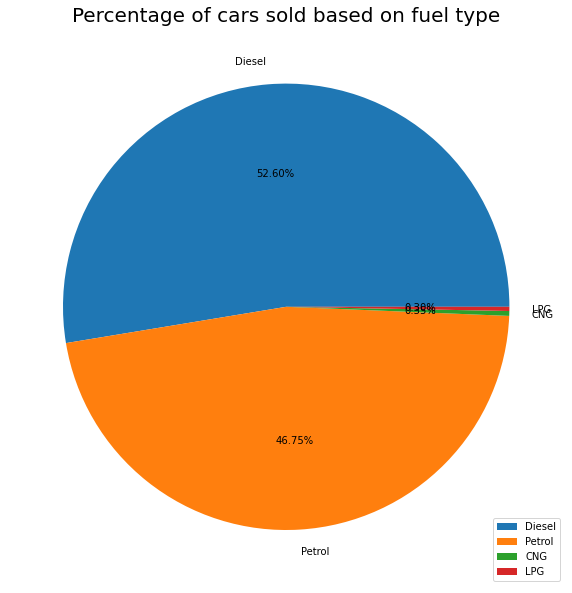

In [9]:
#Percentage of cars sold based on fuel type
plt.figure(figsize=(10,25))
plt.pie(car_data[car_data['Sold']=='Y']['Fuel'].value_counts(),labels=Fuel_data.index,autopct='%1.2f%%')
plt.title('Percentage of cars sold based on fuel type',fontsize=20)
plt.legend(loc=4)

Text(0.5, 1.0, 'No of cars solds per year')

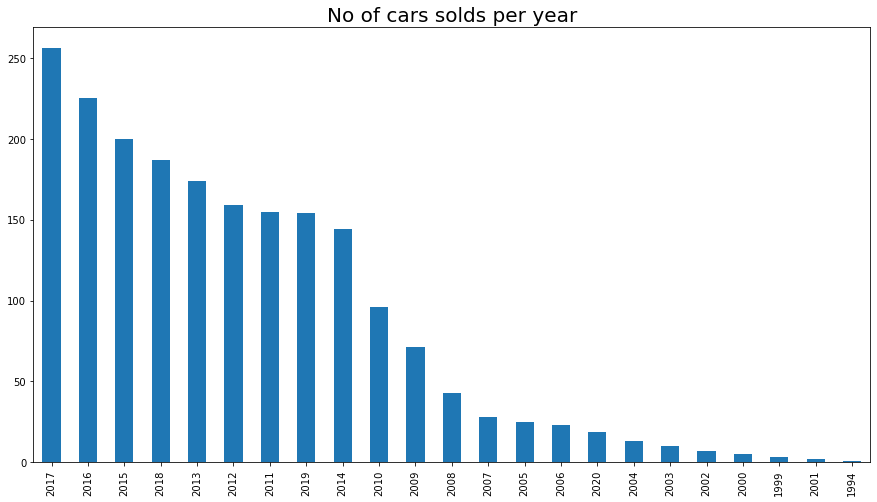

In [14]:
#No of cars sold per year
plt.figure(figsize=(15,8))
car_data[car_data['Sold']=='Y']['Year'].value_counts().plot(kind='bar')
plt.title("No of cars solds per year",fontsize=20)

Text(0.5, 1.0, 'TOP 10 most Selling Brands')

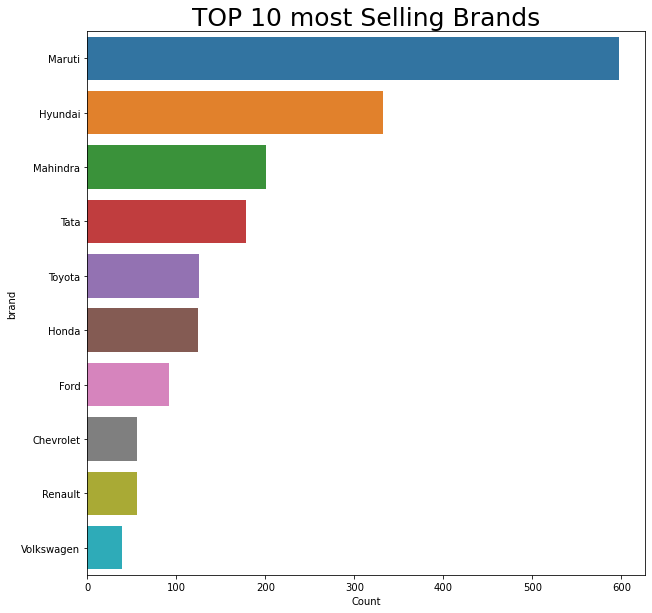

In [88]:
#TOP 10 most Selling Brands
cbrand=pd.DataFrame(car_data[car_data['Sold']=='Y'][['brand']].value_counts().head(10),columns=['Count'])
cbrand.reset_index(inplace=True)
plt.figure(figsize=(10,10))
sns.barplot(x='Count',y='brand',data=cbrand,orient="h")
plt.title('TOP 10 most Selling Brands',fontsize=25)

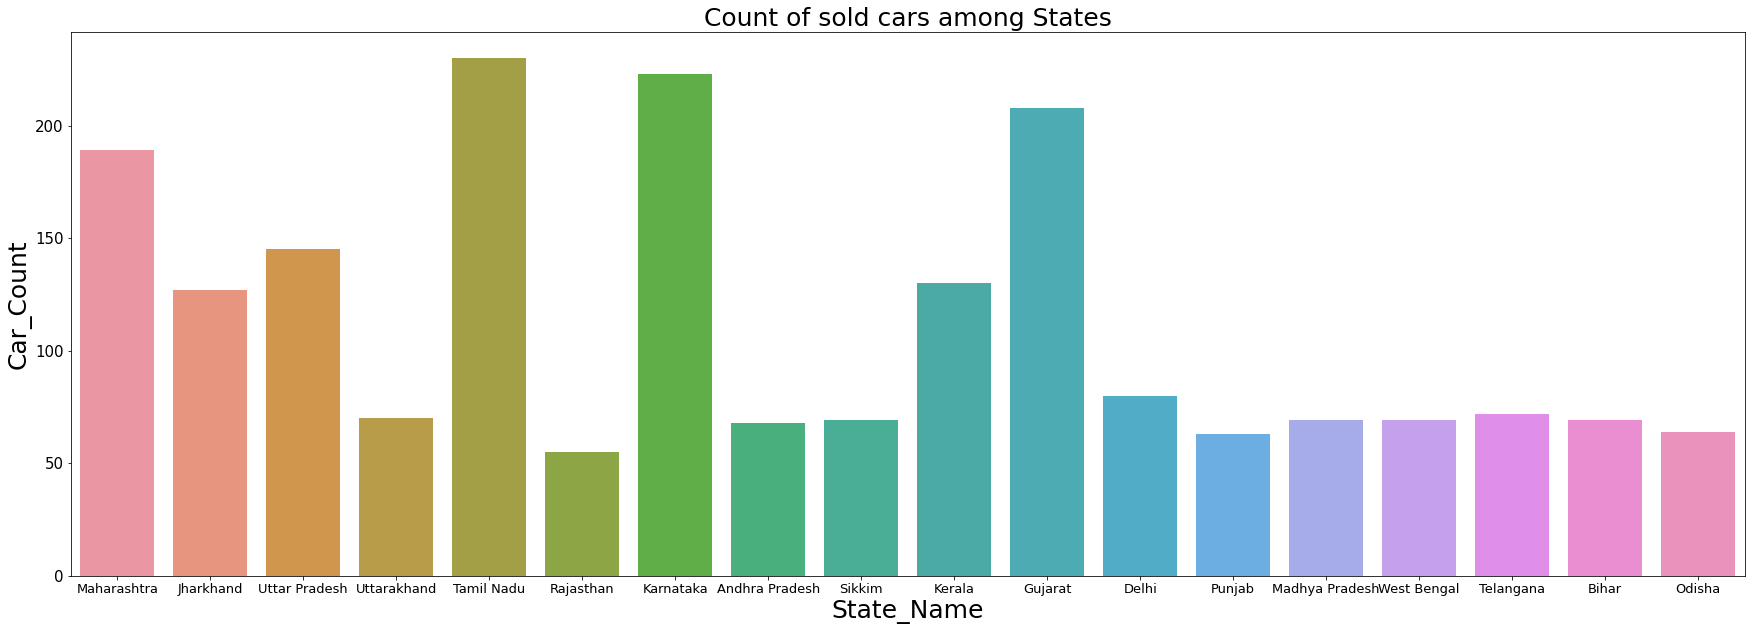

In [87]:
#count of sold cars among states
plt.figure(figsize=(30,10))
sns.countplot(x='State_Name',data=car_data[car_data['Sold']=='Y'])
plt.xlabel('State_Name',fontsize=25)
plt.ylabel('Car_Count',fontsize=25)
plt.xticks(fontsize=13)
plt.yticks(fontsize=15)
plt.title('Count of sold cars among States',fontsize=25)
fig.tight_layout()

<AxesSubplot:xlabel='Mileage', ylabel='Name'>

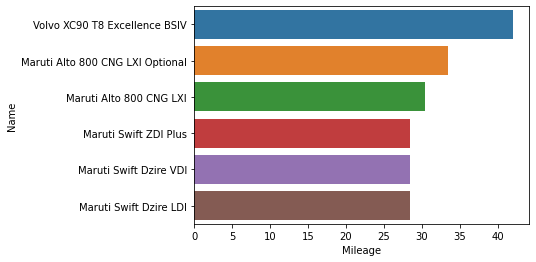

In [86]:
#Top Five Cars with highest mileage among sold cars
Hmileage=car_data[car_data['Sold']=='Y'][['Name','Mileage']].sort_values(by='Mileage',ascending=False).head(10)
sns.barplot(x='Mileage',y='Name',data=Hmileage,orient='h')

In [18]:
car_data.columns

Index(['Sales_ID', 'Name', 'Year', 'Selling_Price', 'km_Driven', 'City_Code',
       'State_Code', 'Postal_Code', 'Fuel', 'Seller_Type', 'Transmission',
       'Owner', 'Mileage', 'Engine', 'Max_Power', 'Seats', 'City_Name',
       'Region_Code', 'Sold', 'State_Name', 'Region', 'brand'],
      dtype='object')

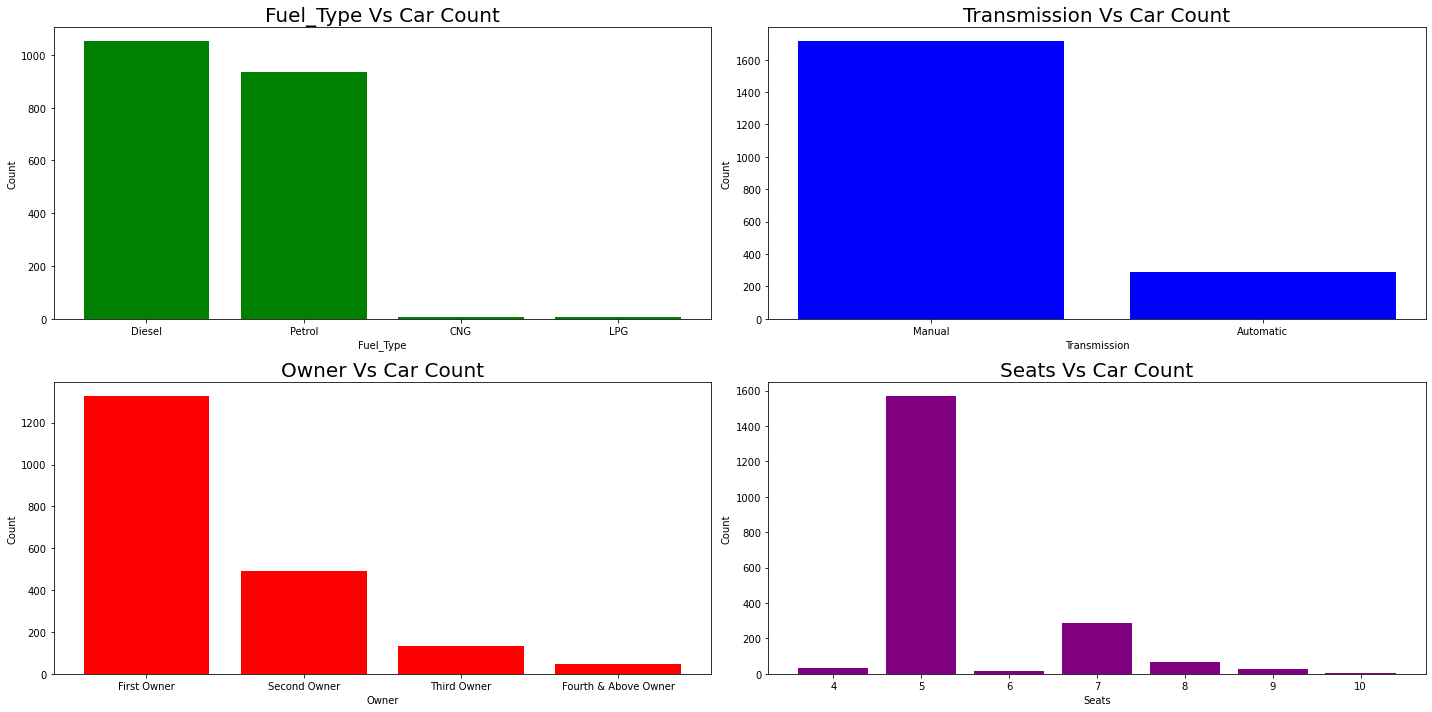

In [40]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(20,10))
axes[0,0].bar(car_data[car_data['Sold']=='Y']['Fuel'].value_counts().index,car_data[car_data['Sold']=='Y']['Fuel'].value_counts().values,color='green')
axes[0,0].set_xlabel('Fuel_Type')
axes[0,0].set_ylabel('Count')
axes[0,0].set_title('Fuel_Type Vs Car Count',fontsize=20)

axes[0,1].bar(car_data[car_data['Sold']=='Y']['Transmission'].value_counts().index,car_data[car_data['Sold']=='Y']['Transmission'].value_counts().values,color='blue')
axes[0,1].set_xlabel('Transmission')
axes[0,1].set_ylabel('Count')
axes[0,1].set_title('Transmission Vs Car Count',fontsize=20)

axes[1,0].bar(car_data[car_data['Sold']=='Y']['Owner'].value_counts().index,car_data[car_data['Sold']=='Y']['Owner'].value_counts().values,color='red')
axes[1,0].set_xlabel('Owner')
axes[1,0].set_ylabel('Count')
axes[1,0].set_title('Owner Vs Car Count',fontsize=20)

axes[1,1].bar(car_data[car_data['Sold']=='Y']['Seats'].value_counts().index,car_data[car_data['Sold']=='Y']['Seats'].value_counts().values,color='purple')
axes[1,1].set_xlabel('Seats')
axes[1,1].set_ylabel('Count')
axes[1,1].set_title('Seats Vs Car Count',fontsize=20)

fig.tight_layout()

## Conclusion of the above features 
1. Maximum cars are of petrol and diesel type among Sold Cars.
2. Manual cars are more than Automatic cars among Sold Cars.
3. First-hand cars are maximum followed by second amongs Sold Cars.
4. Cars with 5 seats are dominant among Sold Cars.

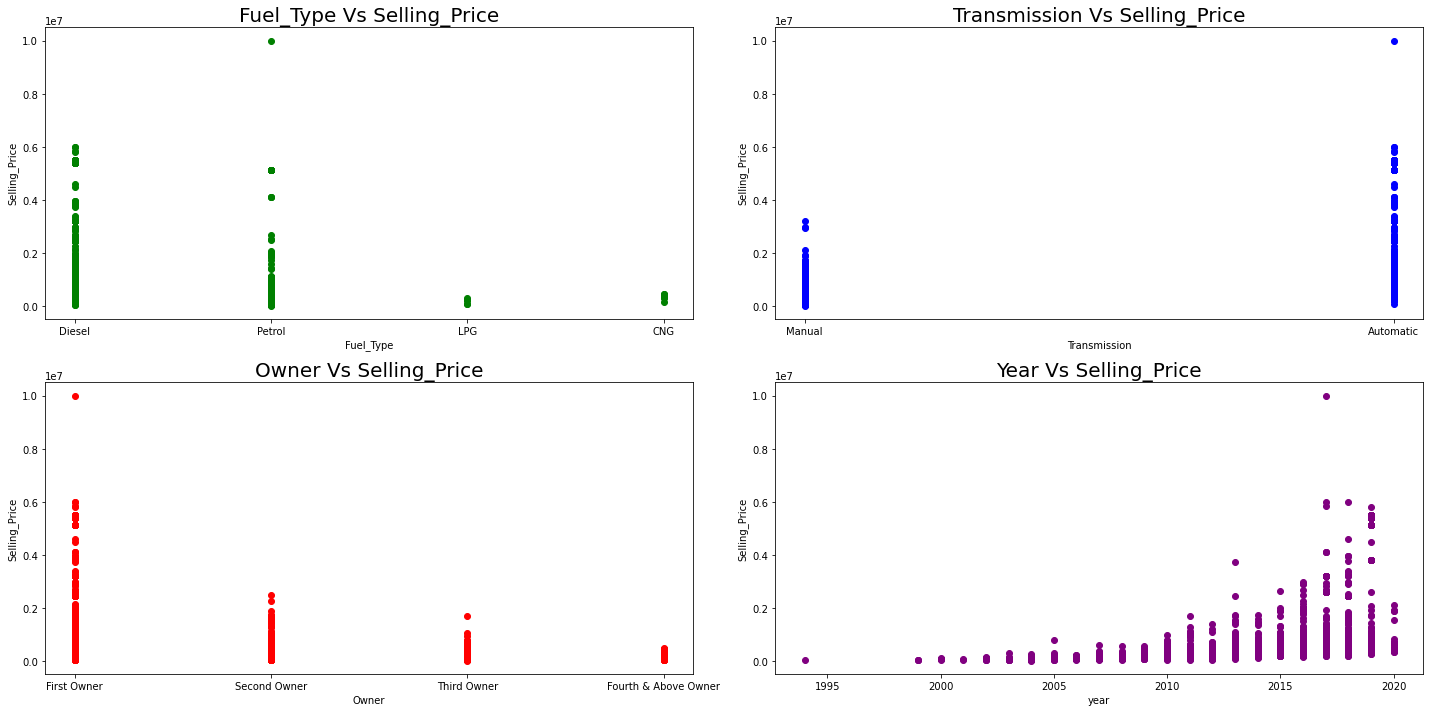

In [39]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(20,10))
axes[0,0].scatter(x='Fuel',y='Selling_Price',data=car_data[car_data['Sold']=='Y'],color='green')
axes[0,0].set_xlabel('Fuel_Type')
axes[0,0].set_ylabel('Selling_Price')
axes[0,0].set_title('Fuel_Type Vs Selling_Price',fontsize=20)

axes[0,1].scatter(x='Transmission',y='Selling_Price',data=car_data[car_data['Sold']=='Y'],color='blue')
axes[0,1].set_xlabel('Transmission')
axes[0,1].set_ylabel('Selling_Price')
axes[0,1].set_title('Transmission Vs Selling_Price',fontsize=20)

axes[1,0].scatter(x='Owner',y='Selling_Price',data=car_data[car_data['Sold']=='Y'],color='red')
axes[1,0].set_xlabel('Owner')
axes[1,0].set_ylabel('Selling_Price')
axes[1,0].set_title('Owner Vs Selling_Price',fontsize=20)

axes[1,1].scatter(x='Year',y='Selling_Price',data=car_data[car_data['Sold']=='Y'],color='purple')
axes[1,1].set_xlabel('year')
axes[1,1].set_ylabel('Selling_Price')
axes[1,1].set_title('Year Vs Selling_Price',fontsize=20)

fig.tight_layout()

## Conclusion of the above features

1. Petrol and diesel cars are costly among Sold Cars.
2. Automatic cars cost more than manual cars among Sold Cars.
3. First-hand cars are costly followed by second-hand Cars.
4. Sold Cars ranging between the years 2012 to 2020 cost more.

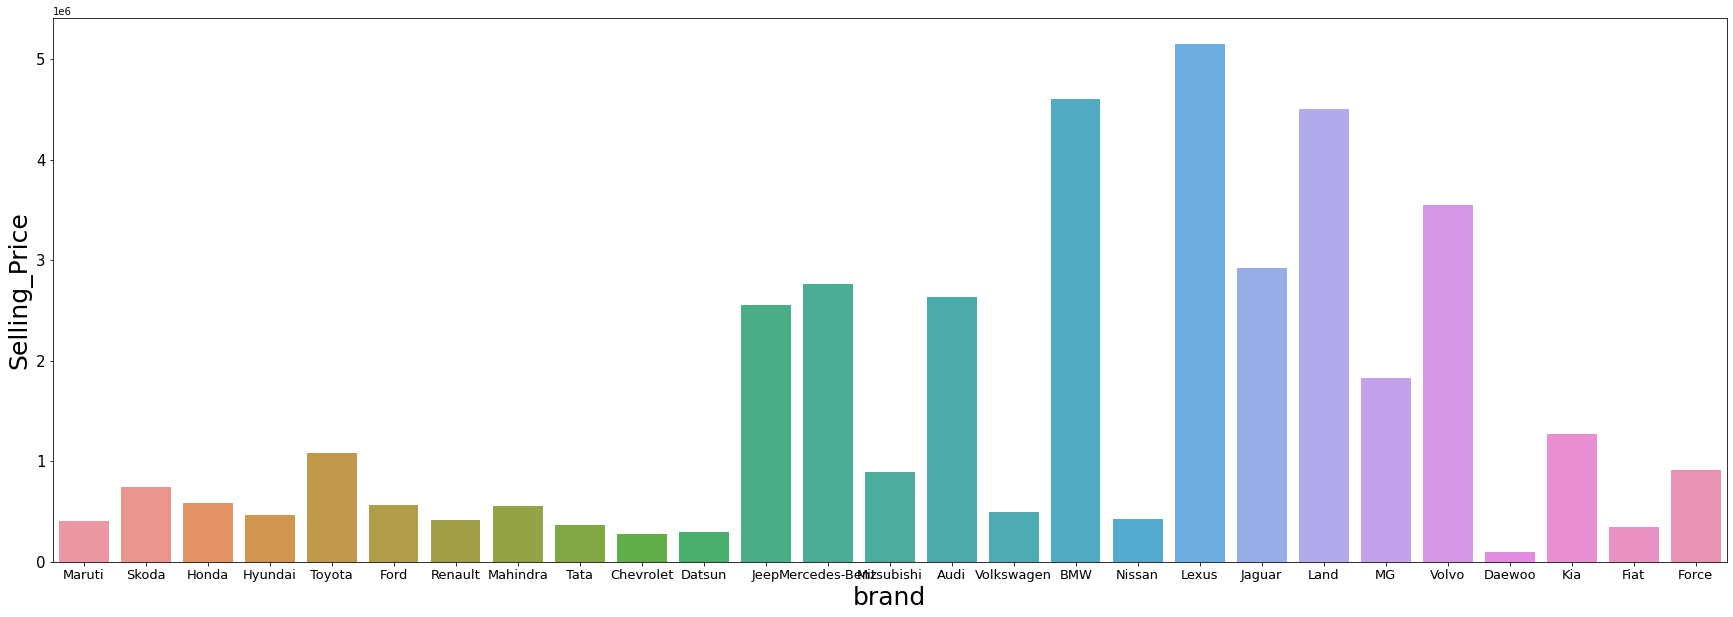

In [58]:
plt.figure(figsize=(30,10))
sns.barplot(x='brand',y='Selling_Price',data=car_data[car_data['Sold']=='Y'],estimator=np.mean,ci=None)
plt.xlabel('brand',fontsize=25)
plt.ylabel('Selling_Price',fontsize=25)
plt.xticks(fontsize=13)
plt.yticks(fontsize=15)
fig.tight_layout()

#### Among Sold Cars Lexus has highest avg selling price

In [71]:
car_data['State_Name'].unique()

array(['Maharashtra', 'Jharkhand', 'Uttar Pradesh', 'Uttarakhand',
       'Tamil Nadu', 'Rajasthan', 'Karnataka', 'Andhra Pradesh', 'Sikkim',
       'Kerala', 'Gujarat', 'Delhi', 'Punjab', 'Madhya Pradesh',
       'West Bengal', 'Telangana', 'Bihar', 'Odisha'], dtype=object)

In [91]:
car_data[car_data['brand']=='Lexus']

,Sales_ID,Name,Year,Selling_Price,km_Driven,City_Code,State_Code,Postal_Code,Fuel,Seller_Type,...,Mileage,Engine,Max_Power,Seats,City_Name,Region_Code,Sold,State_Name,Region,brand
127,133,Lexus ES 300h,2019,5150000,20000,CT05,ST25,500004,Petrol,Dealer,...,22.37,2487,214.56,5,Hyderabad,R4,Y,Telangana,South,Lexus
358,372,Lexus ES 300h,2019,5150000,20000,CT20,ST28,208002,Petrol,Dealer,...,22.37,2487,214.56,5,kanpur,R1,Y,Uttar Pradesh,Central,Lexus
396,411,Lexus ES 300h,2019,5150000,20000,CT17,ST07,391510,Petrol,Dealer,...,22.37,2487,214.56,5,Vadodara,R3,Y,Gujarat,West,Lexus
628,648,Lexus ES 300h,2019,5150000,20000,CT04,ST24,641001,Petrol,Dealer,...,22.37,2487,214.56,5,Coimbatore,R4,Y,Tamil Nadu,South,Lexus
1047,1079,Lexus ES 300h,2019,5150000,20000,CT09,ST34,110029,Petrol,Dealer,...,22.37,2487,214.56,5,Delhi,R5,Y,Delhi,North,Lexus
1066,1098,Lexus ES 300h,2019,5150000,20000,CT10,ST12,560002,Petrol,Dealer,...,22.37,2487,214.56,5,Bangalore,R4,Y,Karnataka,South,Lexus
1085,1117,Lexus ES 300h,2019,5150000,20000,CT12,ST28,201301,Petrol,Dealer,...,22.37,2487,214.56,5,Noida,R1,Y,Uttar Pradesh,Central,Lexus
1104,1136,Lexus ES 300h,2019,5150000,20000,CT25,ST01,524225,Petrol,Dealer,...,22.37,2487,214.56,5,Nellore,R4,Y,Andhra Pradesh,South,Lexus
1514,1563,Lexus ES 300h,2019,5150000,20000,CT23,ST12,574142,Petrol,Dealer,...,22.37,2487,214.56,5,Mangalore,R4,Y,Karnataka,South,Lexus
1660,1711,Lexus ES 300h,2019,5150000,20000,CT25,ST01,524225,Petrol,Dealer,...,22.37,2487,214.56,5,Nellore,R4,Y,Andhra Pradesh,South,Lexus


In [90]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)